## Example plotting following [ASP Docs Section 8.19](https://stereopipeline.readthedocs.io/en/latest/examples/aster.html#aster) for ASTER with and without mapprojection

Below are example `asp_plot` outputs following the processing in ASP Docs ASTER example [Section 8.19](https://stereopipeline.readthedocs.io/en/latest/examples/aster.html#aster).

We diverge from the documentation example data, instead retrieving the example data used in https://github.com/uw-cryo/asp_tutorials:

```bash
wget https://zenodo.org/record/7972223/files/AST_L1A_00307312017190728_20200218153629_19952.zip

mkdir dataDir

tar xvf AST_L1A_00307312017190728_20200218153629_19952.zip -C dataDir
```

---

Pre-process the images for stereo:

```bash
aster2asp dataDir -o out
```

to output:

```
out-Band3B.tif
out-Band3B.xml
out-Band3N.tif
out-Band3N.xml
```

---

Run stereo processing and point2dem without initial mapprojection:

```bash
parallel_stereo -t aster         \
  --stereo-algorithm asp_mgm     \
  --subpixel-mode 9              \
  --aster-use-csm                \
   out-Band3N.tif out-Band3B.tif \
   out-Band3N.xml out-Band3B.xml \
   out_stereo/run

point2dem -r earth --auto-proj-center \
  --errorimage \
  out_stereo/run-PC.tif
```

---

Followed by re-processing with the additional mapprojection step onto a low-res output:

```bash
point2dem -r earth --auto-proj-center \
  --tr 200 out_stereo/run-PC.tif      \
  -o out_stereo/run-200m

mapproject --tr 15 --aster-use-csm \
  out_stereo/run-200m-DEM.tif      \
  out-Band3N.tif out-Band3N.xml out-Band3N_proj.tif

mapproject --tr 15 --aster-use-csm \
  out_stereo/run-200m-DEM.tif      \
  out-Band3B.tif out-Band3B.xml out-Band3B_proj.tif

parallel_stereo -t aster                  \
  --stereo-algorithm asp_mgm              \
  --subpixel-mode 9                       \
  --aster-use-csm                         \
  out-Band3N_proj.tif out-Band3B_proj.tif \
  out-Band3N.xml out-Band3B.xml           \
  out_stereo_proj/run                     \
  out_stereo/run-200m-DEM.tif

point2dem -r earth --auto-proj-center \
  --errorimage \
  out_stereo_proj/run-PC.tif
```

---

The results with and without mapprojection are displayed below.

## Full report

Example command for full stereo-processing report

### No Mapprojection

In [1]:
directory = "/Users/ben/Dropbox/UW_Shean/asp_plot-test_data/docs_examples/docs_sect_8_19_aster/"
stereo_directory = "out_stereo/"

In [2]:
!asp_plot \
  --directory $directory \
  --stereo_directory $stereo_directory \
  --dem_filename run-DEM.tif \
  --subset_km 1 \
  --plot_geometry False


Processing ASP files in /Users/ben/Dropbox/UW_Shean/asp_plot-test_data/docs_examples/docs_sect_8_19_aster/


No reference DEM found in log files. Please supply the reference DEM you used during stereo processing (or another reference DEM) if you would like to see some difference maps.



ASP DEM: /Users/ben/Dropbox/UW_Shean/asp_plot-test_data/docs_examples/docs_sect_8_19_aster/out_stereo/run-DEM.tif


Using map projection from DEM: EPSG:32610


No reference DEM found in log files. Please supply the reference DEM you used during stereo processing (or another reference DEM) if you would like to see some difference maps.



ASP DEM: /Users/ben/Dropbox/UW_Shean/asp_plot-test_data/docs_examples/docs_sect_8_19_aster/out_stereo/run-DEM.tif

Figure saved to /Users/ben/Dropbox/UW_Shean/asp_plot-test_data/docs_examples/docs_sect_8_19_aster/tmp_asp_report_plots/00.png
Plotting DEM results. This can take a minute for large inputs.
Figure saved to /Users/ben/Dropbox/UW_Shean/asp_plot-test_data/doc

### Mapprojection

In [3]:
stereo_directory = "out_stereo_proj/"

In [4]:
!asp_plot \
  --directory $directory \
  --stereo_directory $stereo_directory \
  --dem_filename run-DEM.tif \
  --subset_km 1 \
  --plot_geometry False


Processing ASP files in /Users/ben/Dropbox/UW_Shean/asp_plot-test_data/docs_examples/docs_sect_8_19_aster/


Reference DEM: out_stereo/run-200m-DEM.tif


ASP DEM: /Users/ben/Dropbox/UW_Shean/asp_plot-test_data/docs_examples/docs_sect_8_19_aster/out_stereo_proj/run-DEM.tif


Using map projection from DEM: EPSG:32610


Reference DEM: out_stereo/run-200m-DEM.tif


ASP DEM: /Users/ben/Dropbox/UW_Shean/asp_plot-test_data/docs_examples/docs_sect_8_19_aster/out_stereo_proj/run-DEM.tif

Figure saved to /Users/ben/Dropbox/UW_Shean/asp_plot-test_data/docs_examples/docs_sect_8_19_aster/tmp_asp_report_plots/00.png
Plotting DEM results. This can take a minute for large inputs.

No DEM of difference found. Generating now using reference DEM: out_stereo/run-200m-DEM.tif.


Traceback (most recent call last):
  File "/Users/ben/miniforge3/envs/asp_plot/lib/python3.13/site-packages/xarray/backends/file_manager.py", line 219, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~

## Individual plots

Example modular usage of `asp_plot` for this example processing.

### Processing Parameters

In [3]:
%load_ext autoreload
%autoreload 2

from asp_plot.processing_parameters import ProcessingParameters

In [4]:
processing_parameters = ProcessingParameters(
    processing_directory=directory,
    stereo_directory=stereo_directory
)
processing_parameters_dict = processing_parameters.from_log_files()

print(f"Processed on: {processing_parameters_dict['processing_timestamp']}\n")

print(f"Reference DEM: {processing_parameters_dict['reference_dem']}\n")

print(f"Bundle adjustment ({processing_parameters_dict['bundle_adjust_run_time']}):\n")
print(processing_parameters_dict["bundle_adjust"])

print(f"\nStereo ({processing_parameters_dict['stereo_run_time']}):\n")
print(processing_parameters_dict["stereo"])

print(f"\nPoint2dem ({processing_parameters_dict['point2dem_run_time']}):\n")
print(processing_parameters_dict["point2dem"])

Processed on: 2025-10-31 11:17:37

Reference DEM: 

Bundle adjustment (N/A):

Bundle adjustment not run

Stereo (1 hours and 5 minutes):

stereo --stereo-algorithm asp_mgm --subpixel-mode 9 --corr-seed-mode 1 --compute-point-cloud-center-only --threads 40 P02_001981_1823.map.cub P03_002258_1817.map.cub results/out

Point2dem (0 hours and 11 minutes):

point2dem -r mars --stereographic --auto-proj-center results/out-PC.tif


### Scene Plots

In [5]:
from asp_plot.scenes import ScenePlotter

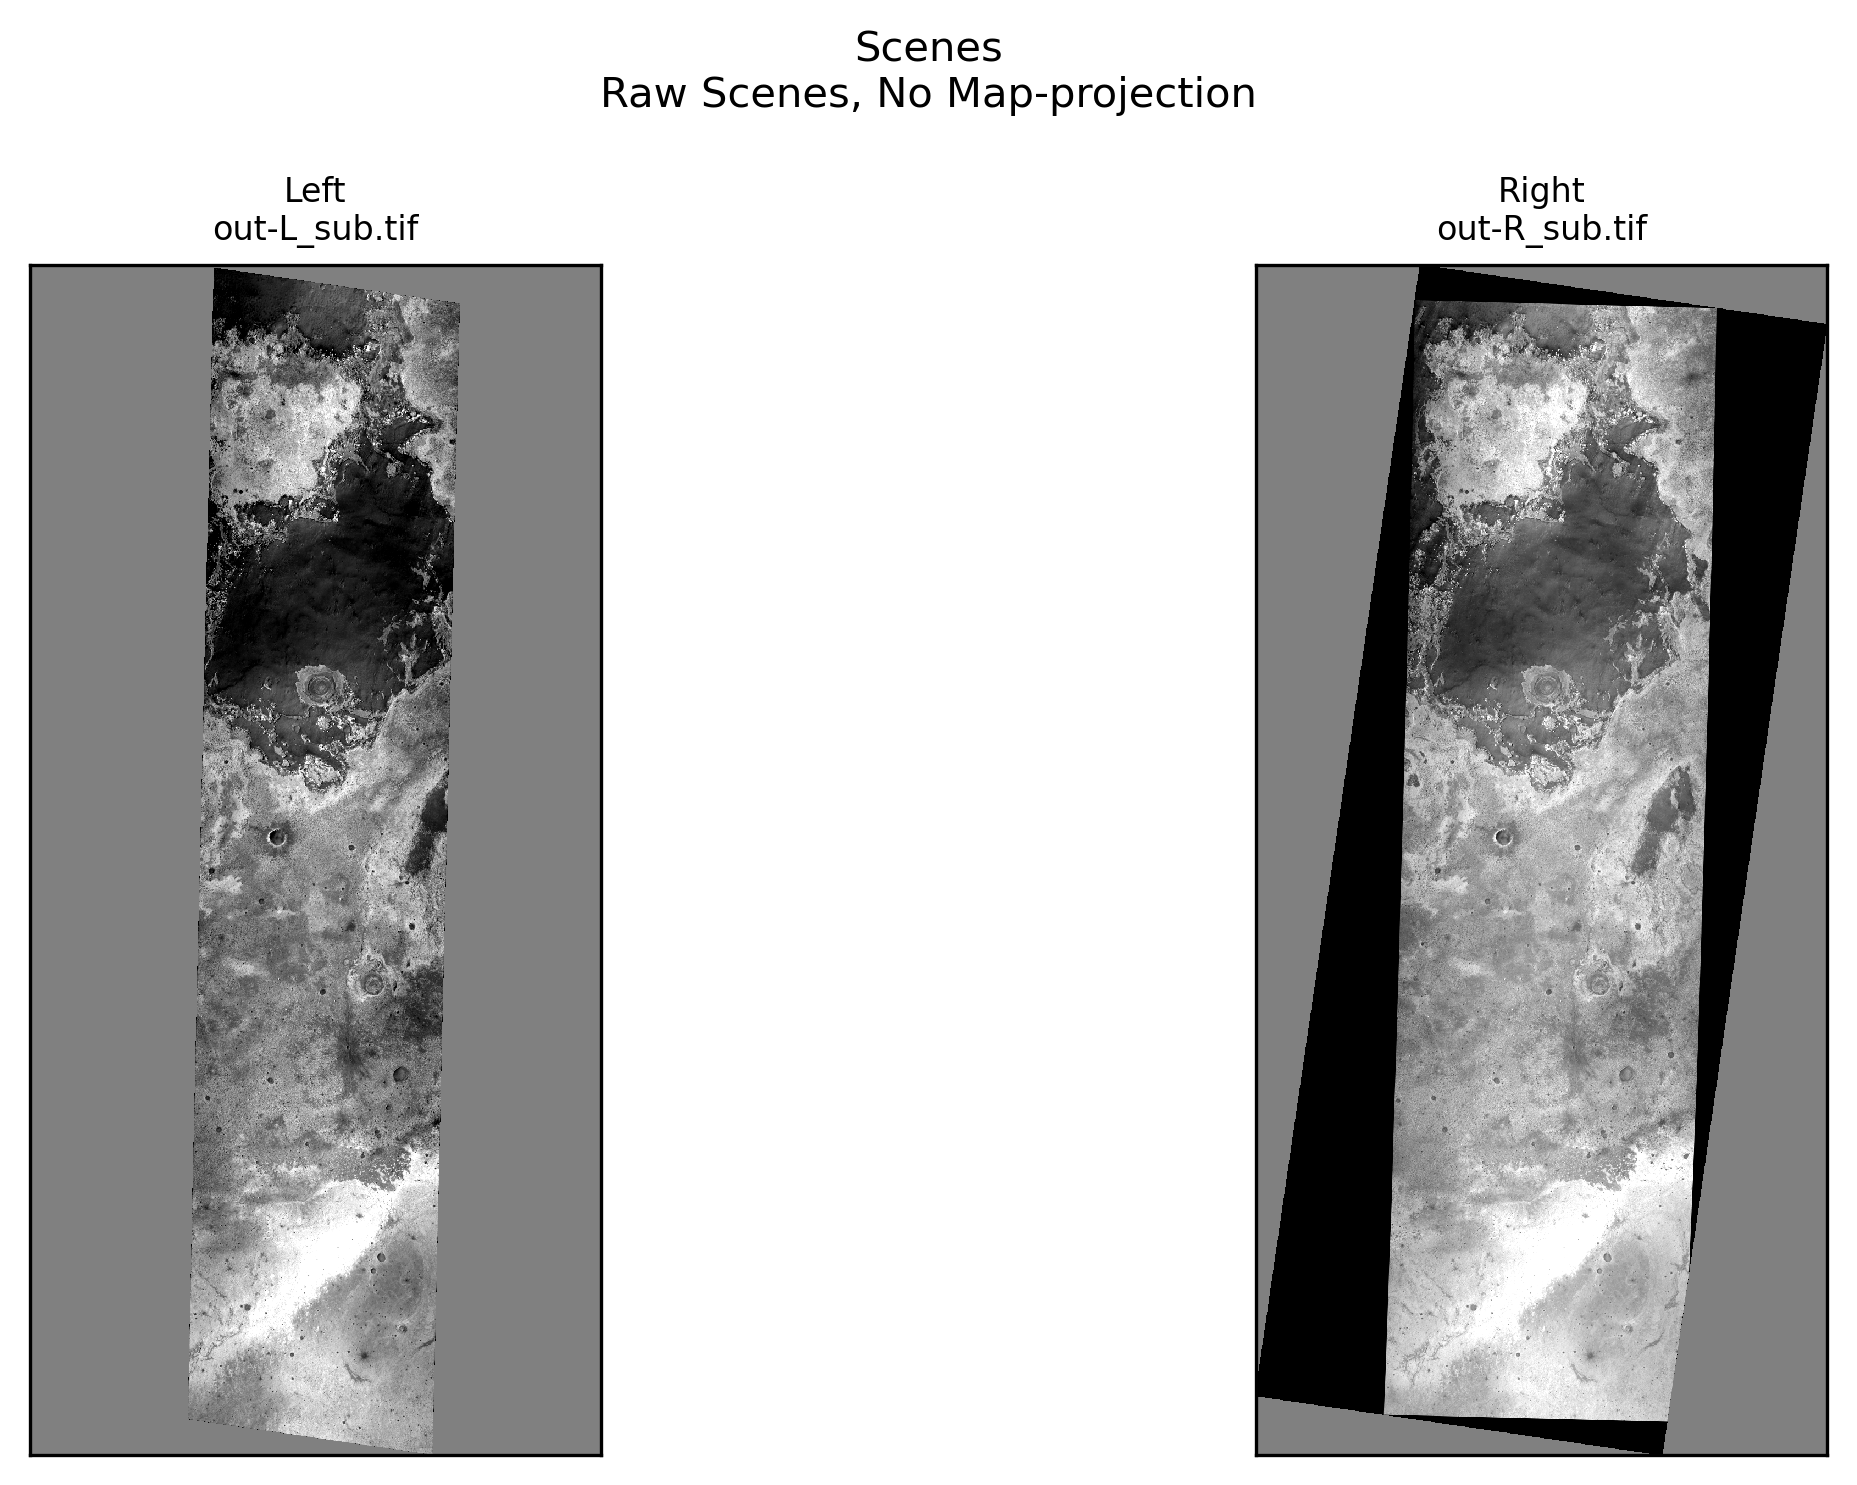

In [6]:
plotter = ScenePlotter(
  directory,
  stereo_directory,
  title="Scenes"
)

plotter.plot_scenes()

### Stereo Plots

In [7]:
from asp_plot.stereo import StereoPlotter

In [8]:
plotter = StereoPlotter(
  directory, 
  stereo_directory
)


No reference DEM found in log files. Please supply the reference DEM you used during stereo processing (or another reference DEM) if you would like to see some difference maps.





ASP DEM: /Users/ben/Dropbox/UW_Shean/asp_plot-test_data/docs_examples/docs_sect_8_3_mars_ctx_SEE_PFE/results/out-DEM.tif




Intersection error file not found. Plotting hillshade without details.


/Users/ben/miniforge3/envs/asp_plot/lib/python3.13/site-packages/osgeo/gdal.py:311: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


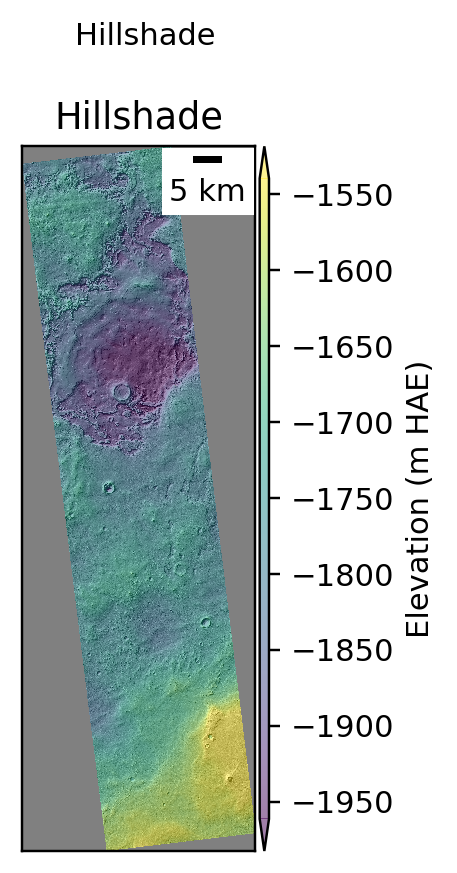

In [9]:
plotter.title = "Hillshade"

plotter.plot_detailed_hillshade()

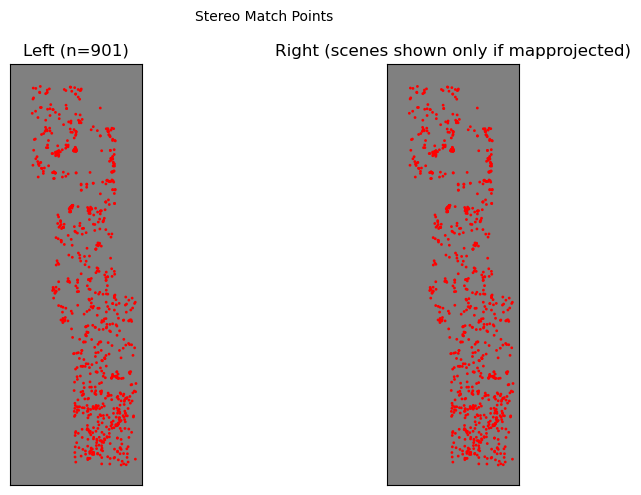

In [10]:
plotter.title="Stereo Match Points"

plotter.plot_match_points()

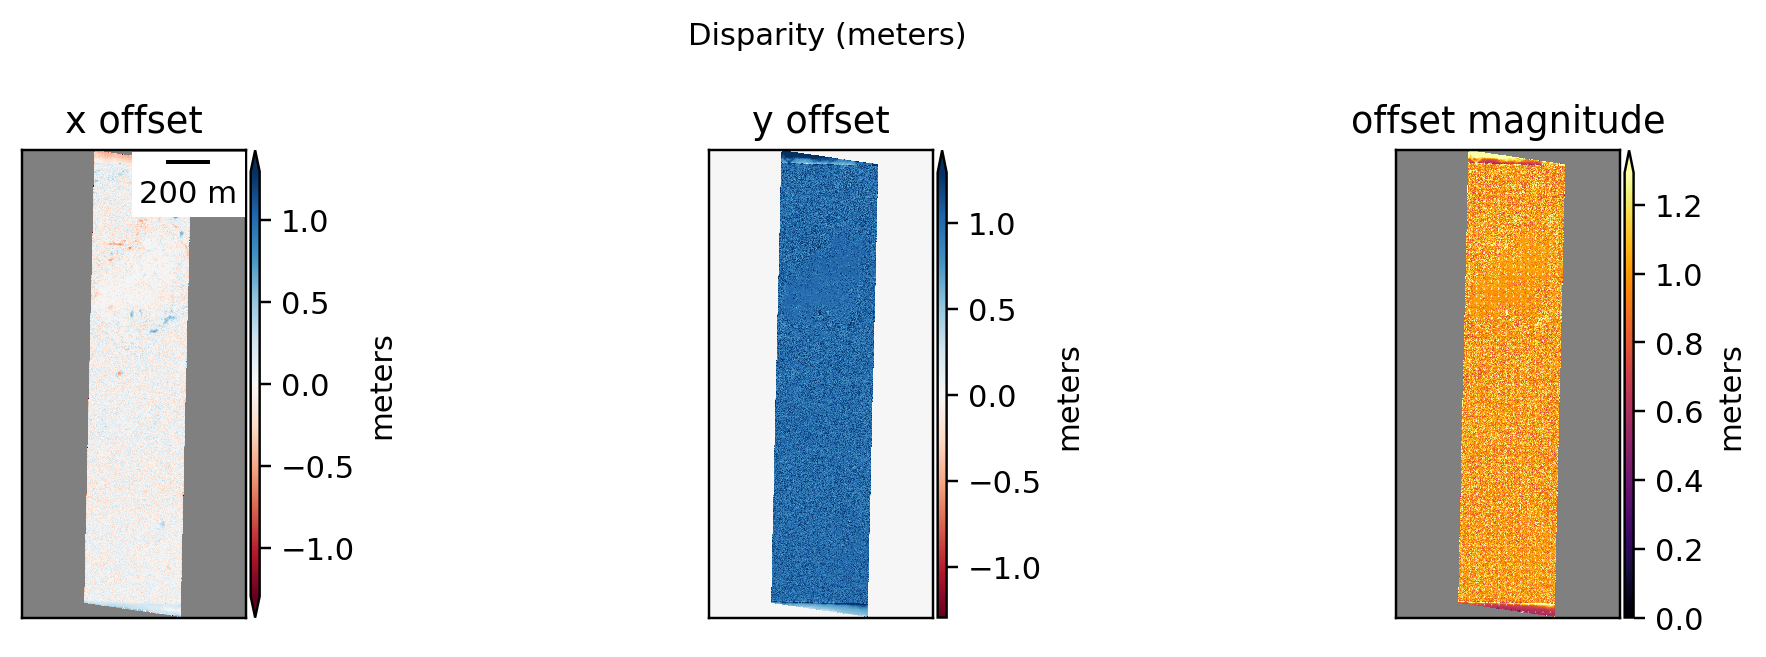

In [11]:
plotter.title = "Disparity (meters)"

plotter.plot_disparity(
  unit="meters",
  quiver=True,
)

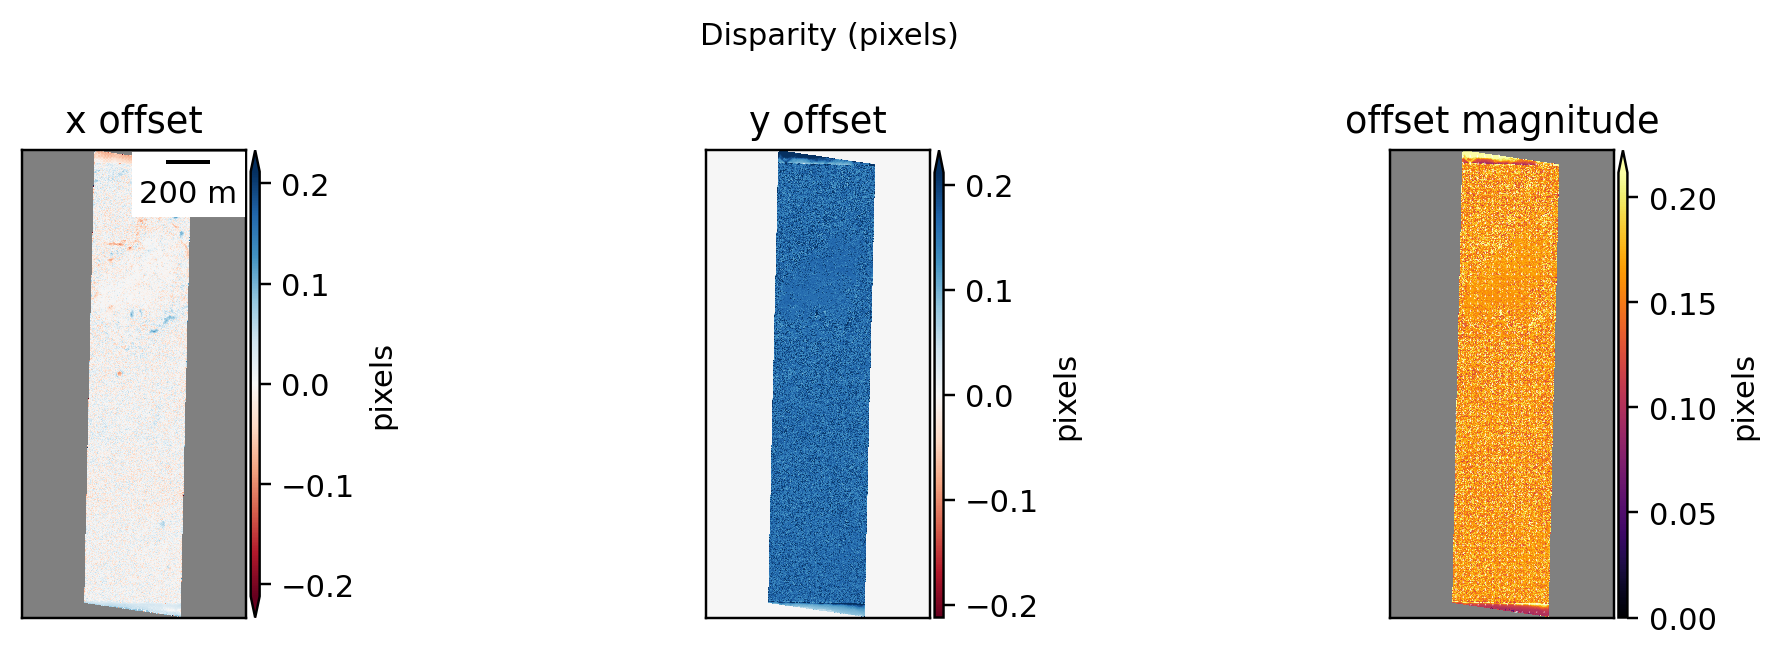

In [12]:
plotter.title = "Disparity (pixels)"

plotter.plot_disparity(
  unit="pixels",
  quiver=True,
)

Plotting DEM results. This can take a minute for large inputs.


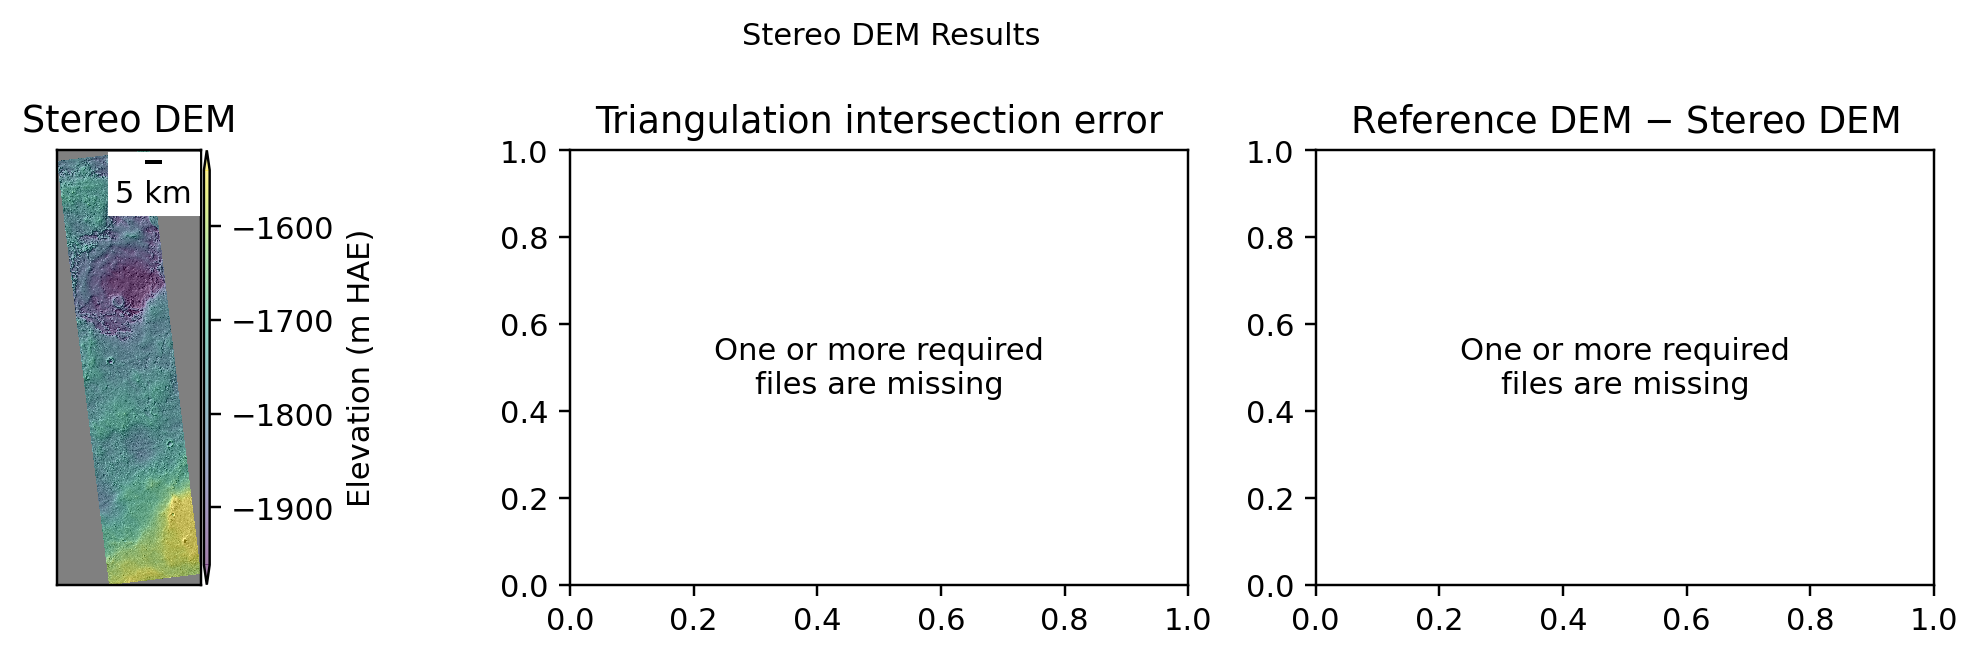

In [13]:
plotter.title = "Stereo DEM Results"

plotter.plot_dem_results()